<h1>Load data</h1>

In [16]:
import sys
sys.path.append("../") 

from definitions import *
from module.data_processing.data_processing import load_data, filter_data, get_train_test
from module.data_processing.data_processing import normalize_by_series, get_batches, add_gaussian_noise

In [17]:
batch_size = 128

data, best_genes = load_data(1000, None)
data = filter_data(data, 'Tissue', 'Whole blood')

train_data, test_data = get_train_test(data)

<h1>Define T-SNE utils</h1>

In [18]:
from sklearn.manifold import TSNE

def calculate_tsne(data):
    tsne_results = TSNE(n_components=2).fit_transform(data)
    return tsne_results

In [24]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_tsne_matplotlib(tsne, target_column, title=None):
    le = LabelEncoder()
    labels = le.fit_transform(target_column)
    
    plt.figure(figsize=(16, 10))
    
    n_classes = len(np.unique(labels))
    import matplotlib
    print(labels)
    
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels)
        
    plt.legend()
    
    if title is not None:
        image_name = os.path.join(IMAGES_DIR, '{}.png'.format(title))
        plt.savefig(image_name)

    plt.grid(True)

def plot_tsne_seaborn(tsne, target_column, title=None):
    df_subset = pd.DataFrame()
    df_subset['tsne-2d-one'] = tsne[:, 0]
    df_subset['tsne-2d-two'] = tsne[:, 1]

    plt.figure(figsize=(16, 10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=target_column,
        palette=sns.color_palette("hls", target_column.nunique()),
        data=df_subset,
        legend="full",
        alpha=0.3
    )

    if title is not None:
        image_name = os.path.join(IMAGES_DIR, '{}.png'.format(title))
        plt.savefig(image_name)

<h3>Raw data t-nse</h3>

In [20]:
train_tsne = calculate_tsne(train_data[best_genes])

[0 0 0 ... 1 1 1]


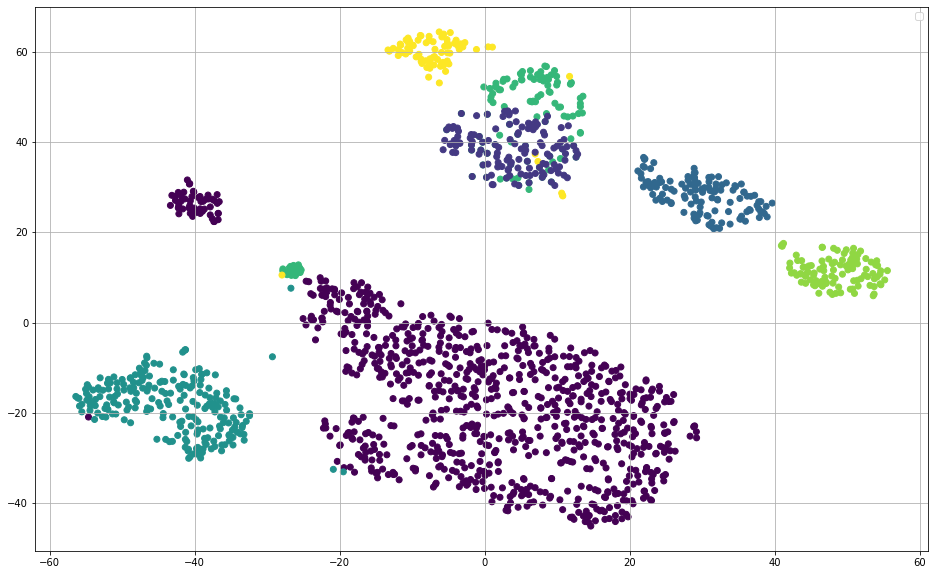

In [27]:
plot_tsne_matplotlib(train_tsne, train_data['GEO'], 'raw_train_data_tsne')

<h3>Normalized data t-nse</h3>

In [13]:
normalized_train_data = normalize_by_series(train_data, best_genes)
normalized_test_data = normalize_by_series(test_data, best_genes)

/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/aonishchuk/anaconda3/envs/mstrHW/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
normalized_train_tnse = calculate_tsne(normalized_train_data[best_genes])

[0 0 0 ... 1 1 1]


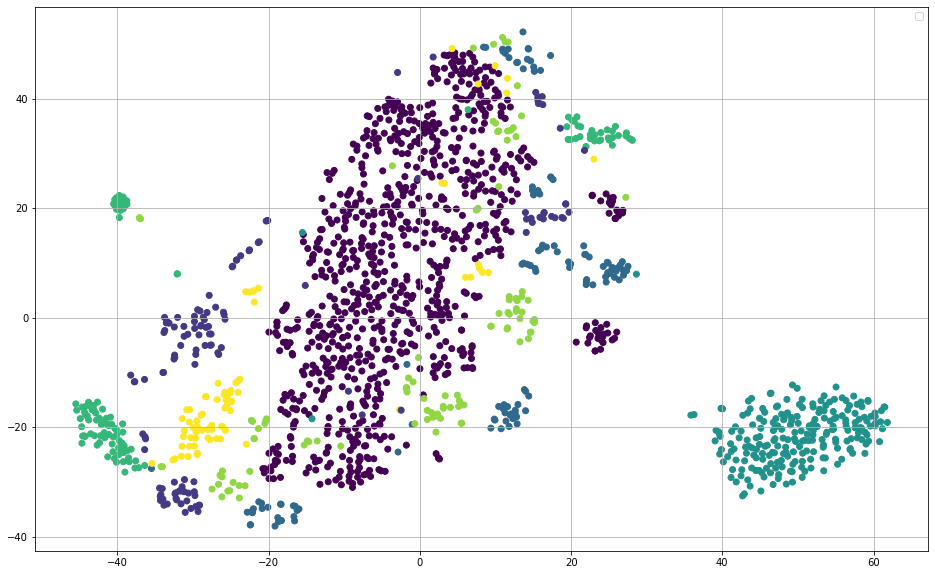

In [15]:
plot_tsne_matplotlib(normalized_train_tnse, normalized_train_data['GEO'])

<h3>Log data t-nse</h3>

In [25]:
def apply_log(data, shift=0.):
    return np.log(data + shift)

In [32]:
_train_data = train_data.copy()
_train_data.loc[:, best_genes] = apply_log(_train_data.loc[:, best_genes], 3)
normalized_train_data = normalize_by_series(_train_data, best_genes)

In [33]:
train_tsne = calculate_tsne(normalized_train_data[best_genes])

[0 0 0 ... 1 1 1]


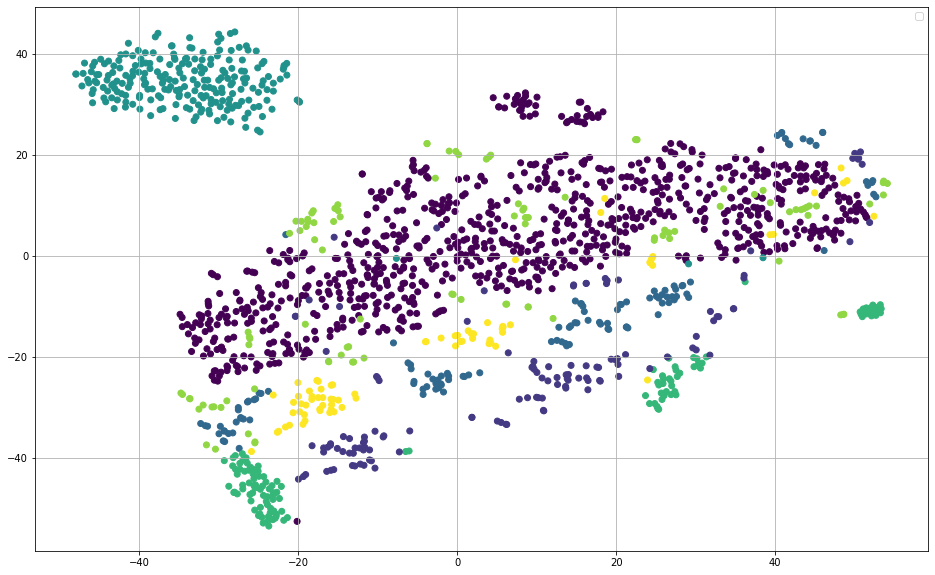

In [34]:
plot_tsne_matplotlib(train_tsne, normalized_train_data['GEO'])

In [35]:
_test_data = test_data.copy()
_test_data.loc[:, best_genes] = apply_log(_test_data.loc[:, best_genes], 3)
normalized_test_data = normalize_by_series(_test_data, best_genes)

In [36]:
test_tsne = calculate_tsne(normalized_test_data[best_genes])

[7 7 7 ... 1 1 1]


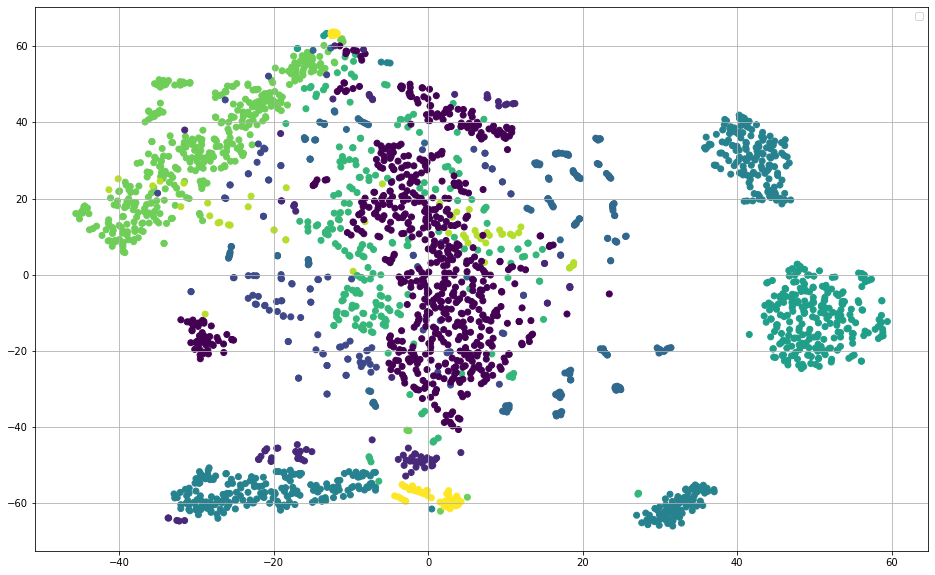

In [37]:
plot_tsne_matplotlib(test_tsne, normalized_test_data['GEO'])